In [18]:
#Udemy CNN Practice code
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Import all keras libraries

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [2]:
#Initializing a CNN model
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Flatten())
classifier.add(Dense(units=512, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
classifier.add(Dense(units=256, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dense(units=1, activation='softmax'))

In [3]:
#Compiling CNN model
classifier.compile(optimizer=Adam(lr=1e-3, decay = 0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [4]:
#Fit the model
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                rescale = 1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
               '/Users/trinakarmakar/anaconda2/data/Udemy/DLCourse/train/',
               target_size = (64, 64),
               batch_size = 32,
               class_mode = 'binary')

test_set = test_datagen.flow_from_directory(
               '/Users/trinakarmakar/anaconda2/data/Udemy/DLCourse/test/',
               target_size = (64, 64),
               batch_size = 32,
               class_mode = 'binary')

#validation_generator = test_datagen.flow_from_directory(
#        '/Users/trinakarmakar/anaconda2/data/Udemy/DLCourse/validation/,
#        target_size=(150, 150),
#        batch_size=32,
#        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
'''
fit_generator(self, generator, steps_per_epoch, epochs=1, verbose=1, 
callbacks=None, validation_data=None, validation_steps=None, 
class_weight=None, max_q_size=10, workers=1, pickle_safe=False, initial_epoch=0)
'''
classifier.fit_generator(
      training_set,
      steps_per_epoch=1000,
      epochs=25,
#      validation_data=validation_generator,
      validation_data = test_set,
      validation_steps=500
    )

Epoch 1/10
100/100 [==============================] - 247s - loss: 7.8765 - acc: 0.5059 - val_loss: 7.9731 - val_acc: 0.4999

{'dog': 1, 'cat': 0}


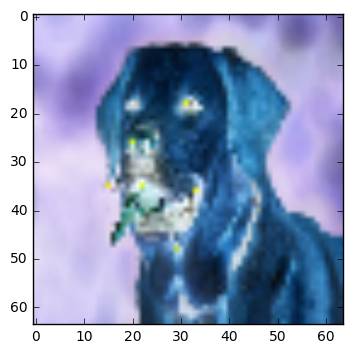

In [20]:
import numpy as np
from keras.preprocessing import image
test_image_1 = image.load_img("/Users/trinakarmakar/anaconda2/data/Udemy/DLCourse/single_prediction/cat_or_dog_1.jpg", target_size=(64, 64))
test_image_1 = image.img_to_array(test_image_1)
plt.imshow(test_image_1)
test_image_1.shape
test_image_1 = np.expand_dims(test_image_1, axis=0)
test_image_1.shape
prediction = classifier.predict(test_image_1)
print(training_set.class_indices)
if prediction[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'    

In [12]:
prediction

'dog'

[[ 1.]]


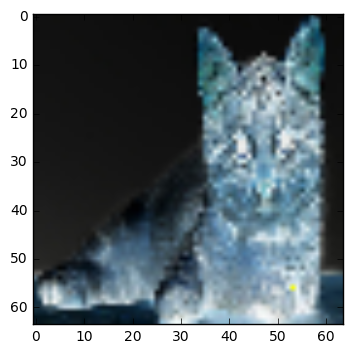

In [21]:
test_image_2 = image.load_img("/Users/trinakarmakar/anaconda2/data/Udemy/DLCourse/single_prediction/cat_or_dog_2.jpg", target_size=(64, 64))
test_image_2 = image.img_to_array(test_image_2)
plt.imshow(test_image_2)
test_image_2.shape
test_image_2 = np.expand_dims(test_image_2, axis=0)
test_image_2.shape
prediction = classifier.predict(test_image_2)
print(prediction)
if prediction[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [14]:
prediction

'dog'

In [ ]:
y_pred = classifier.predict(test_set)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)